<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/AL001_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup of the environment

- Install dependencies
- Download the dataset

In [1]:
# 종속 패키지(dependencies) 설치
"""
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
"""
# use cu101 because colab has CUDA 10.1
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print("\n")
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 3.5MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 12.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=73e7bd7b99d7d7385b34761a8d472aa9a61038080a2cda48d50c5e34ec4f0710
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [2]:
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 9826 (delta 16), reused 29 (delta 13), pack-reused 9776
Receiving objects: 100% (9826/9826), 3.89 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (7218/7218), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.2MB 12.9MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20210109-cp36-none-any.whl size=40741 sha256=c5f7531e818bebfc788d4f5e939a9da66ac9fb8d5f96245df4e897bd3518b329
  Stored in directory: /root/.cache/pip/wheels/4c/13/88/f892ab3326d722a0c6ffdf759fb6ac0e4f88bc549bac06c147
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10508 sha256=f801ec600e7d2b5d514ea534bd7d94578cf9736e17d34b34427b07a904f8281b
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a2a6b9450ea4246d91840a77e1169f7d4722d76bbc47
  Created wheel for pycoco

In [3]:
# 런타임 재시작

In [1]:
!git clone https://github.com/tangsanli5201/DeepPCB


fatal: destination path 'DeepPCB' already exists and is not an empty directory.


In [2]:
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# 2. 디텍트론 동작 테스트

--2021-01-11 06:03:07--  https://www.dropbox.com/s/qg3vbw8vij16e93/beatles-abbeyroad.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qg3vbw8vij16e93/beatles-abbeyroad.jpg [following]
--2021-01-11 06:03:07--  https://www.dropbox.com/s/raw/qg3vbw8vij16e93/beatles-abbeyroad.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca744ac190ee0db9272abb21004.dl.dropboxusercontent.com/cd/0/inline/BGwJzDOFwO-aITfn_7IpfDkrGf8UEGLED5HZAV0kOC3mzlRG4bg-W1eKnSp8cd3pA_D2_TKbkIrFErt5j04im7Yidse45lvrCXH2SJHEsA5OqYVAyJEvyBBqQzT0sCr4gRY/file# [following]
--2021-01-11 06:03:08--  https://uca744ac190ee0db9272abb21004.dl.dropboxusercontent.com/cd/0/inline/BGwJzDOFwO-aITfn_7IpfDkrGf8UEGLED5HZAV0kOC3mzlRG4bg-W1eKnSp8cd3pA_D2_TKbkIrFErt5j04i

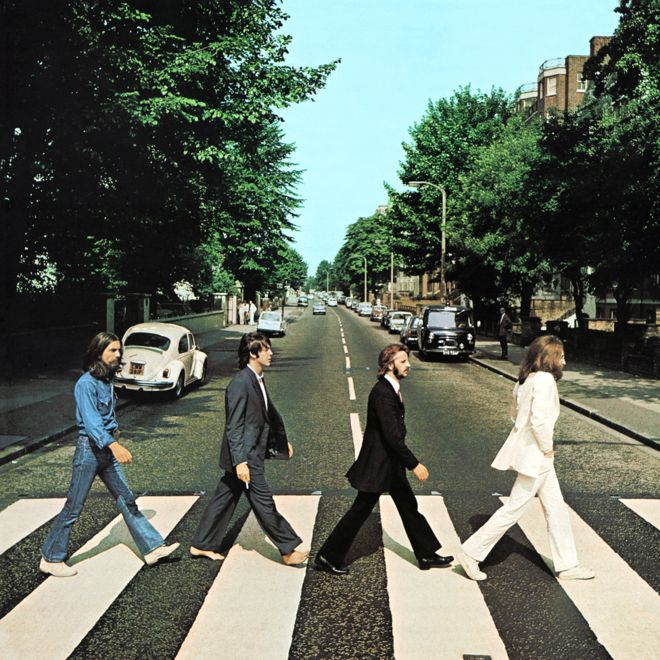

In [3]:
!wget 'https://www.dropbox.com/s/qg3vbw8vij16e93/beatles-abbeyroad.jpg' -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [4]:
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_50_FPN_3x/137849486/model_final_4cafe0.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config ./detectron2_repo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
model_final_4cafe0.pkl: 152MB [00:06, 23.9MB/s]                           


In [5]:
# 출력 형식: https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[ 40.6358, 333.9966, 181.8462, 571.8605],
        [180.2224, 332.4440, 308.6822, 565.9091],
        [319.9937, 343.9012, 458.5180, 570.7783],
        [455.5074, 334.1248, 591.9949, 587.4014],
        [114.5481, 319.3491, 208.9405, 397.0024],
        [257.6055, 310.7838, 285.4981, 337.6269],
        [386.3744, 311.6302, 411.2941, 334.0549],
        [354.2631, 302.2026, 372.1566, 317.0580],
        [312.0756, 303.5022, 325.8849, 315.3000],
        [497.4238, 307.6110, 515.6693, 359.1118]], device='cuda:0'))

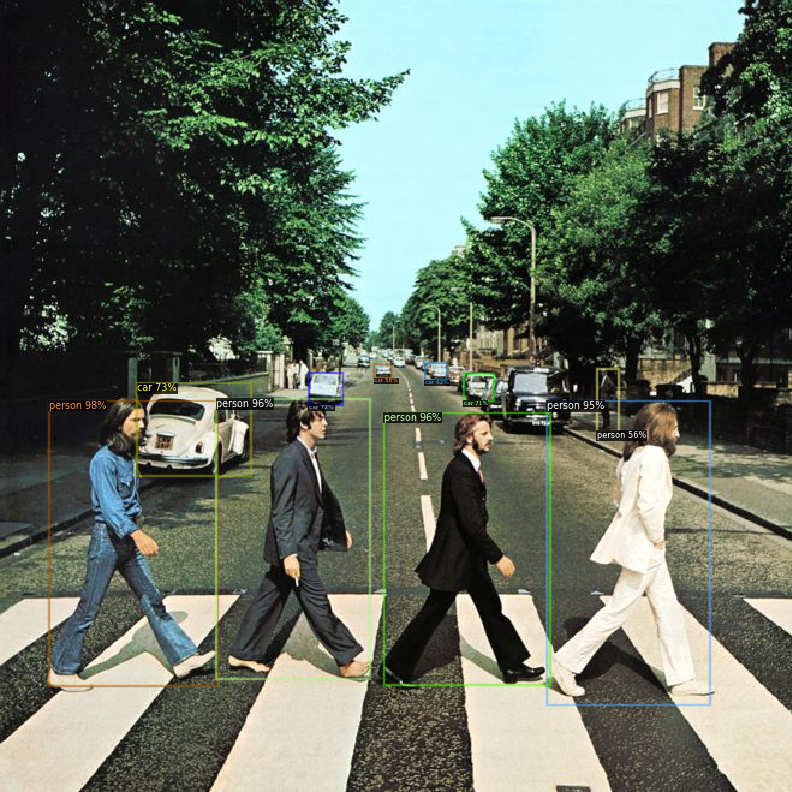

In [6]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [7]:
# segmentation test
cfg = get_cfg()
# 각 테스크에 맞는 적절한 config을 추가해줍니다. 
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# detectron2 model zoo에서 다양한 모델을 사용할 수 있습니다.
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:07, 23.9MB/s]                           


In [8]:
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[ 39.3791, 331.9544, 180.1522, 574.6418],
        [188.0837, 338.0056, 308.4779, 569.5318],
        [452.0458, 332.6617, 589.8115, 581.7493],
        [314.3315, 346.5156, 457.3985, 577.8179],
        [256.4161, 310.3341, 285.7166, 338.4565],
        [386.6102, 311.0589, 412.4352, 334.1367],
        [312.5240, 305.6327, 325.4646, 315.7699],
        [356.5841, 302.7808, 372.4295, 316.8270],
        [369.8478, 305.0507, 387.3161, 322.1160],
        [297.3444, 296.5375, 308.1571, 307.2129],
        [497.3776, 308.3015, 513.7375, 359.4036],
        [326.4428, 297.9355, 337.6827, 306.9364],
        [401.2532, 315.4321, 422.9165, 349.6924],
        [345.2956, 298.0413, 356.8431, 308.6130],
        [119.2872, 320.0363, 207.5050, 399.6386],
        [415.0161, 305.2044, 476.0468, 361.0343],
        [248.8858, 299.4326, 257.6233, 323.2185],
        [336.2272, 295.5576, 346.6370, 305.1942]], device='cuda:0'))

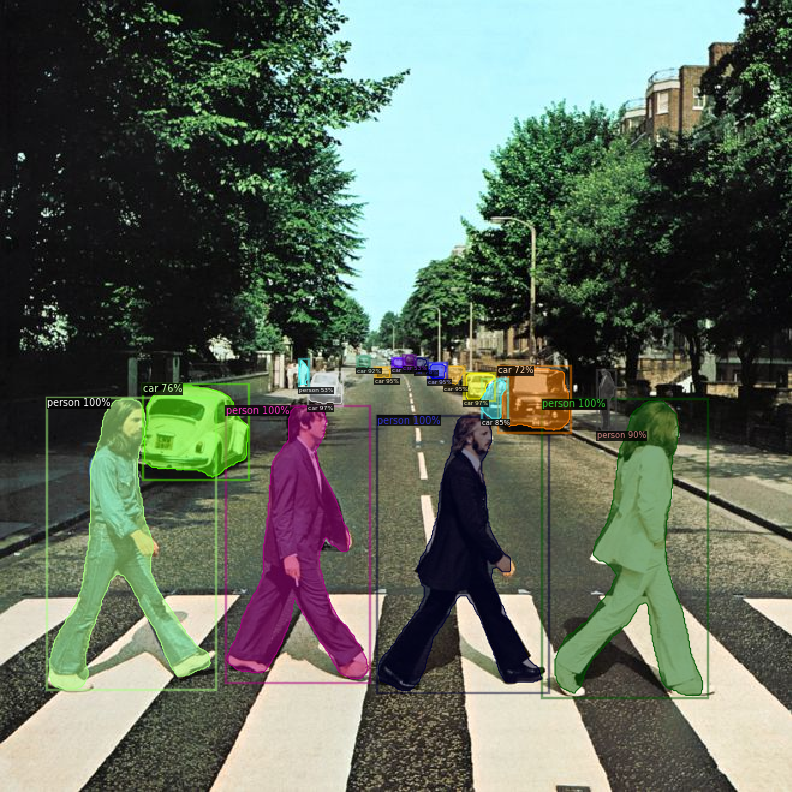

In [9]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

# 2. Walk around a dataset

In [10]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
from PIL import Image
import IPython
def cv2_imshow(img):
    img = img[:,:,[2,1,0]]
    img = Image.fromarray(img)
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [11]:
import csv
train, test = [],[]
def take_path(x,d):
    with open(d) as t:
        #print(t.read())
        #print(type(csv.reader(t)))
        tmp = csv.reader(t,delimiter=' ')
        for i in tmp:
            x.append(i)
        for ele in x:
            ele[0] = './DeepPCB/PCBData/'+ele[0][:-4]+'_test.jpg'
            ele[1] = './DeepPCB/PCBData/'+ele[1]

take_path(test,'./DeepPCB/PCBData/test.txt')
print(test[:2])
take_path(train,'./DeepPCB/PCBData/trainval.txt')
print(train[:2])


[['./DeepPCB/PCBData/group20085/20085/20085291_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085291.txt'], ['./DeepPCB/PCBData/group20085/20085/20085292_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085292.txt']]
[['./DeepPCB/PCBData/group20085/20085/20085000_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085000.txt'], ['./DeepPCB/PCBData/group20085/20085/20085001_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085001.txt']]


In [12]:
height, width = cv2.imread(test[0][0]).shape[:2]
print(height, width)

640 640


# 3. 처리

In [13]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#DatasetCatalog.clear()
#If you want to clear the data you registered, uncomment the upper line.

def get_PCB_dict(data_list):
    dataset_dicts = []
    
    for i,path in enumerate(data_list):
        filename = path[0]
        height, width = cv2.imread(filename).shape[:2]
        record = {}
        record['file_name'] = filename
        record['image_id'] = i
        record['height']= height
        record['width']= width
        
        
        objs = []
        with open(path[1]) as t:
            lines = t.readlines()
            for line in lines:
                if line[-1]=="\n":
                  box = line[:-1].split(' ')
                else:
                  box = line.split(' ')


                boxes = list(map(float,[box[0],box[1],box[2],box[3]]))
                category = int(box[4])

                obj = {
                    "bbox": boxes,
                    "bbox_mode": BoxMode.XYXY_ABS,
                    #"segmentation": [poly], To draw a line, along to ballon
                    #you will need this for mask RCNN
                    "category_id": category-1,
                    "iscrowd": 0
                }
                objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts #list of dicts

In [14]:
from detectron2.data import DatasetCatalog, MetadataCatalog
for d,x in [("train",train), ("test",test)]:
    DatasetCatalog.register("PCB_" + d, lambda x=x: get_PCB_dict(x))
    MetadataCatalog.get("PCB_" + d).set(thing_classes=["open", "short", "mousebite", "spur", "copper", "pin-hole"],thing_colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)])
    #I set the colors, but it's no use. Retry after training.
PCB_metadata = MetadataCatalog.get("PCB_train")

In [15]:
#check dataset
print(type(PCB_metadata))
MetadataCatalog.get("PCB_test")

<class 'detectron2.data.catalog.Metadata'>


Metadata(name='PCB_test', thing_classes=['open', 'short', 'mousebite', 'spur', 'copper', 'pin-hole'], thing_colors=[(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)])

In [16]:
dataset_dicts = get_PCB_dict(train)
print(dataset_dicts[0])
print(dataset_dicts[1])


{'file_name': './DeepPCB/PCBData/group20085/20085/20085000_test.jpg', 'image_id': 0, 'height': 640, 'width': 640, 'annotations': [{'bbox': [409.0, 394.0, 435.0, 422.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, {'bbox': [275.0, 383.0, 319.0, 417.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, {'bbox': [8.0, 163.0, 36.0, 191.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 3, 'iscrowd': 0}, {'bbox': [244.0, 151.0, 270.0, 182.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 4, 'iscrowd': 0}, {'bbox': [338.0, 519.0, 364.0, 543.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 5, 'iscrowd': 0}, {'bbox': [476.0, 460.0, 502.0, 481.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 3, 'iscrowd': 0}]}
{'file_name': './DeepPCB/PCBData/group20085/20085/20085001_test.jpg', 'image_id': 1, 'height': 640, 'width': 640, 'annotations': [{'bbox': [335.0, 208.0, 364.0, 233.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, '

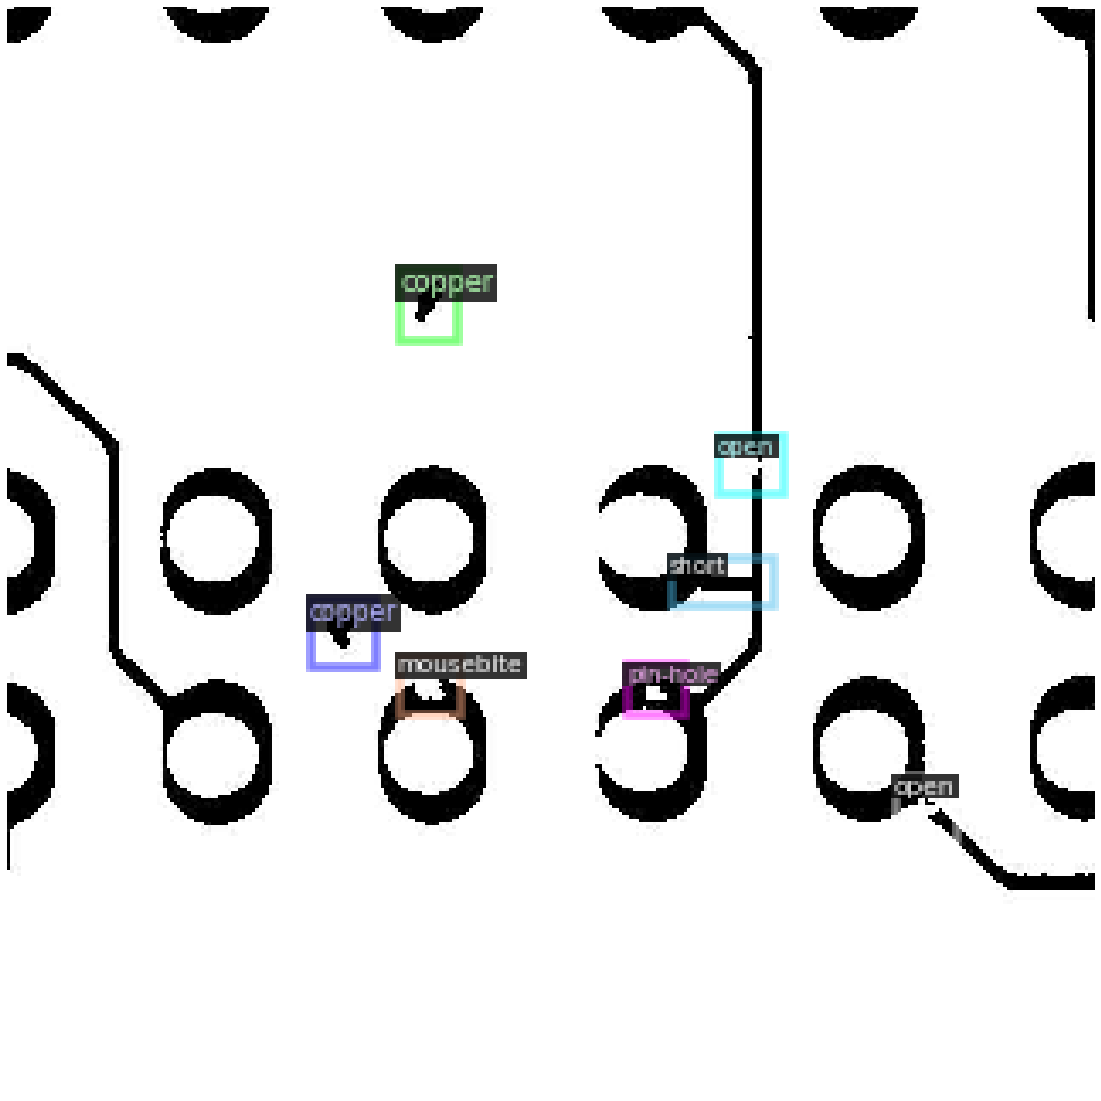

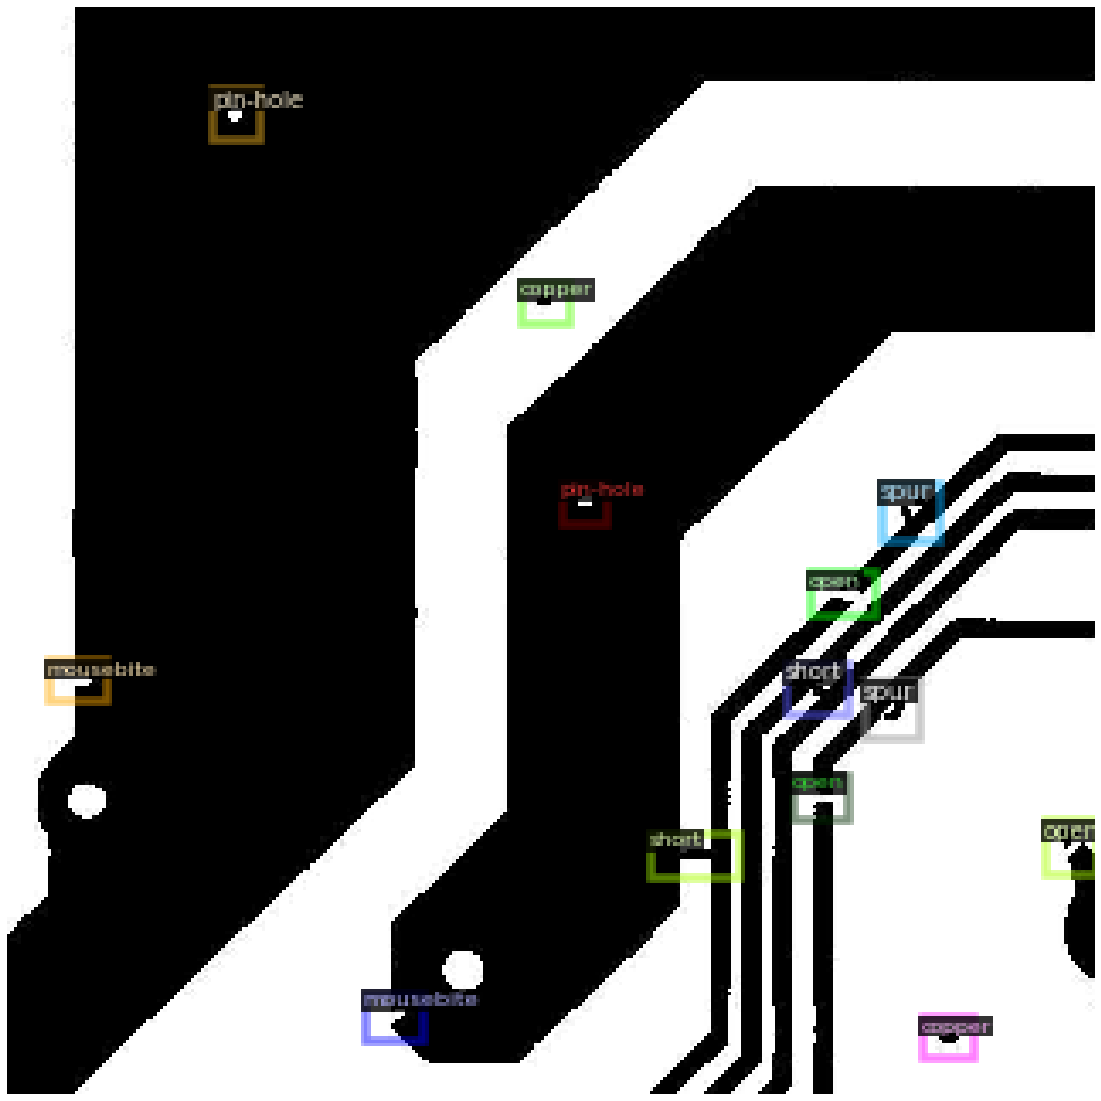

In [17]:
for d in random.sample(dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=PCB_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [18]:
#%cd "/content/detectron2_repo"

In [19]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg


# fine tune

cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file("configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("PCB_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4096   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6 

"""
cfg = get_cfg()

cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("PCB_train",)
cfg.DATASETS.TEST = () # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_50_FPN_3x/137849486/model_final_4cafe0.pkl" # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4096   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # 결함 종류
"""

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()
#It will train about 20 minutes in colab.
#detectron2/output 폴더에 모델가중치가 저장

[01/11 06:06:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:06, 24.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.


[01/11 06:07:00 d2.engine.train_loop]: Starting training from iteration 0
[01/11 06:07:08 d2.utils.events]:  eta: 0:18:06  iter: 19  total_loss: 2.577  loss_cls: 2.005  loss_box_reg: 0.04736  loss_rpn_cls: 0.3927  loss_rpn_loc: 0.1463  time: 0.3595  data_time: 0.0379  lr: 4.9953e-06  max_mem: 2008M
[01/11 06:07:15 d2.utils.events]:  eta: 0:17:24  iter: 39  total_loss: 2.384  loss_cls: 1.858  loss_box_reg: 0.03678  loss_rpn_cls: 0.3778  loss_rpn_loc: 0.1482  time: 0.3533  data_time: 0.0374  lr: 9.9902e-06  max_mem: 2008M
[01/11 06:07:22 d2.utils.events]:  eta: 0:17:25  iter: 59  total_loss: 1.971  loss_cls: 1.469  loss_box_reg: 0.03663  loss_rpn_cls: 0.3079  loss_rpn_loc: 0.1364  time: 0.3543  data_time: 0.0385  lr: 1.4985e-05  max_mem: 2008M
[01/11 06:07:29 d2.utils.events]:  eta: 0:17:20  iter: 79  total_loss: 1.547  loss_cls: 1.015  loss_box_reg: 0.02586  loss_rpn_cls: 0.2492  loss_rpn_loc: 0.1367  time: 0.3564  data_time: 0.0390  lr: 1.998e-05  max_mem: 2008M
[01/11 06:07:36 d2.util

In [20]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("PCB_test", )
predictor = DefaultPredictor(cfg)

In [21]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_PCB_dict(test)

tensor([0, 1, 3, 4, 3], device='cuda:0')
Boxes(tensor([[213.3101, 216.7265, 298.5981, 261.0671],
        [359.0443, 319.4531, 458.9902, 361.4856],
        [421.5184, 123.1841, 458.6568, 172.2669],
        [536.3808, 149.1689, 579.5840, 212.4512],
        [148.9737, 524.5605, 182.6582, 567.5054]], device='cuda:0'))


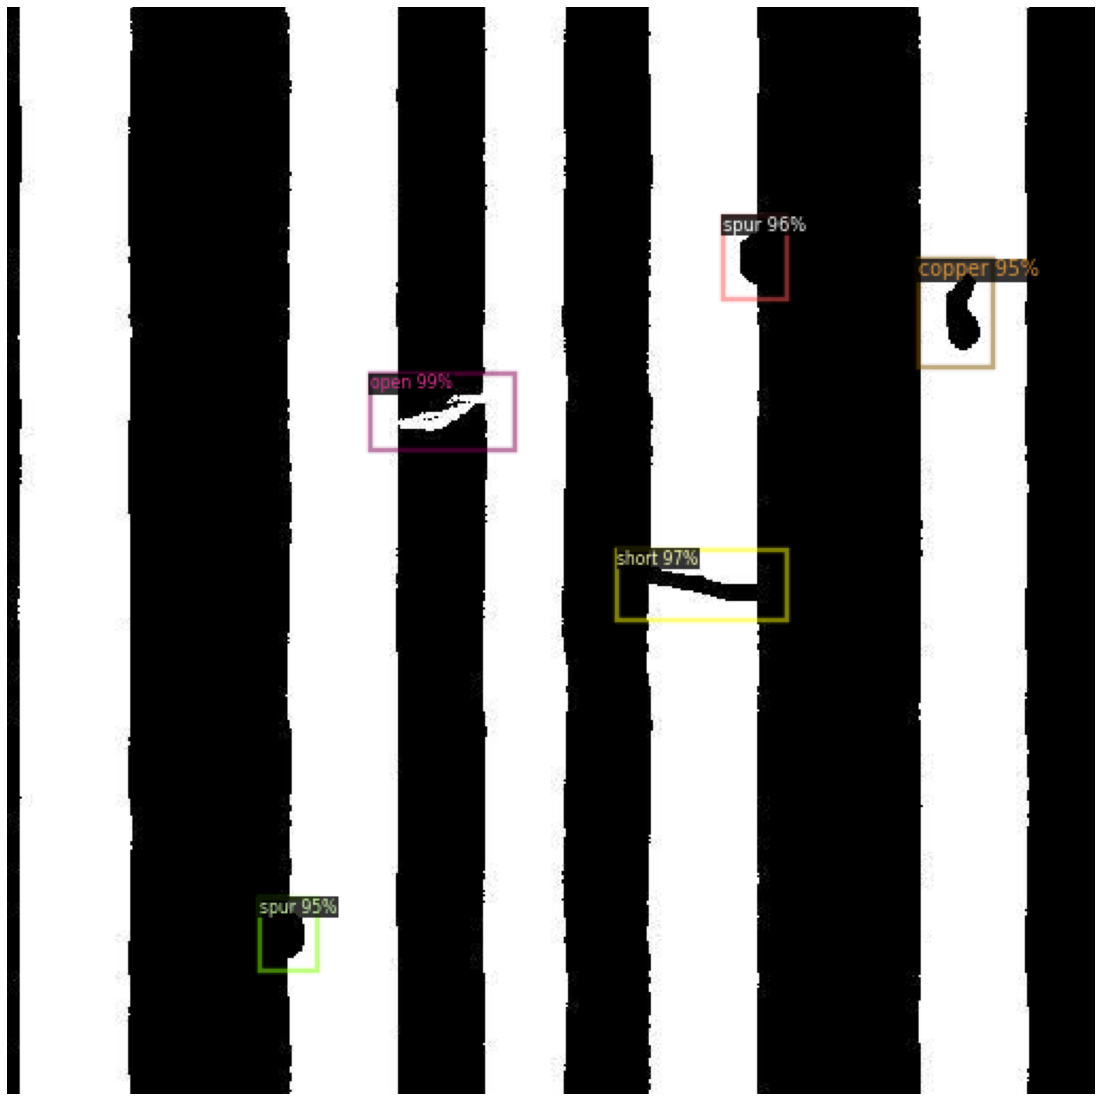

tensor([3, 4, 0, 4, 5, 4, 1, 4, 4, 4, 4, 4], device='cuda:0')
Boxes(tensor([[405.7011, 251.8858, 445.2080, 282.4861],
        [122.6101, 452.2055, 149.8296, 477.0269],
        [417.6204, 517.8893, 452.4109, 547.3981],
        [144.8343, 296.0765, 171.8672, 322.6789],
        [537.0293, 379.2679, 588.1623, 407.6598],
        [ 80.3679, 473.6984, 106.8603, 500.8108],
        [ 14.6590, 365.9592,  37.6686, 408.1443],
        [144.7185, 362.4887, 172.2128, 389.1875],
        [122.3941, 205.9560, 149.8094, 233.7316],
        [ 79.8401, 184.2478, 107.1248, 211.6811],
        [144.6138, 406.5101, 171.7562, 434.1340],
        [144.7926, 251.6846, 171.8965, 278.2385]], device='cuda:0'))


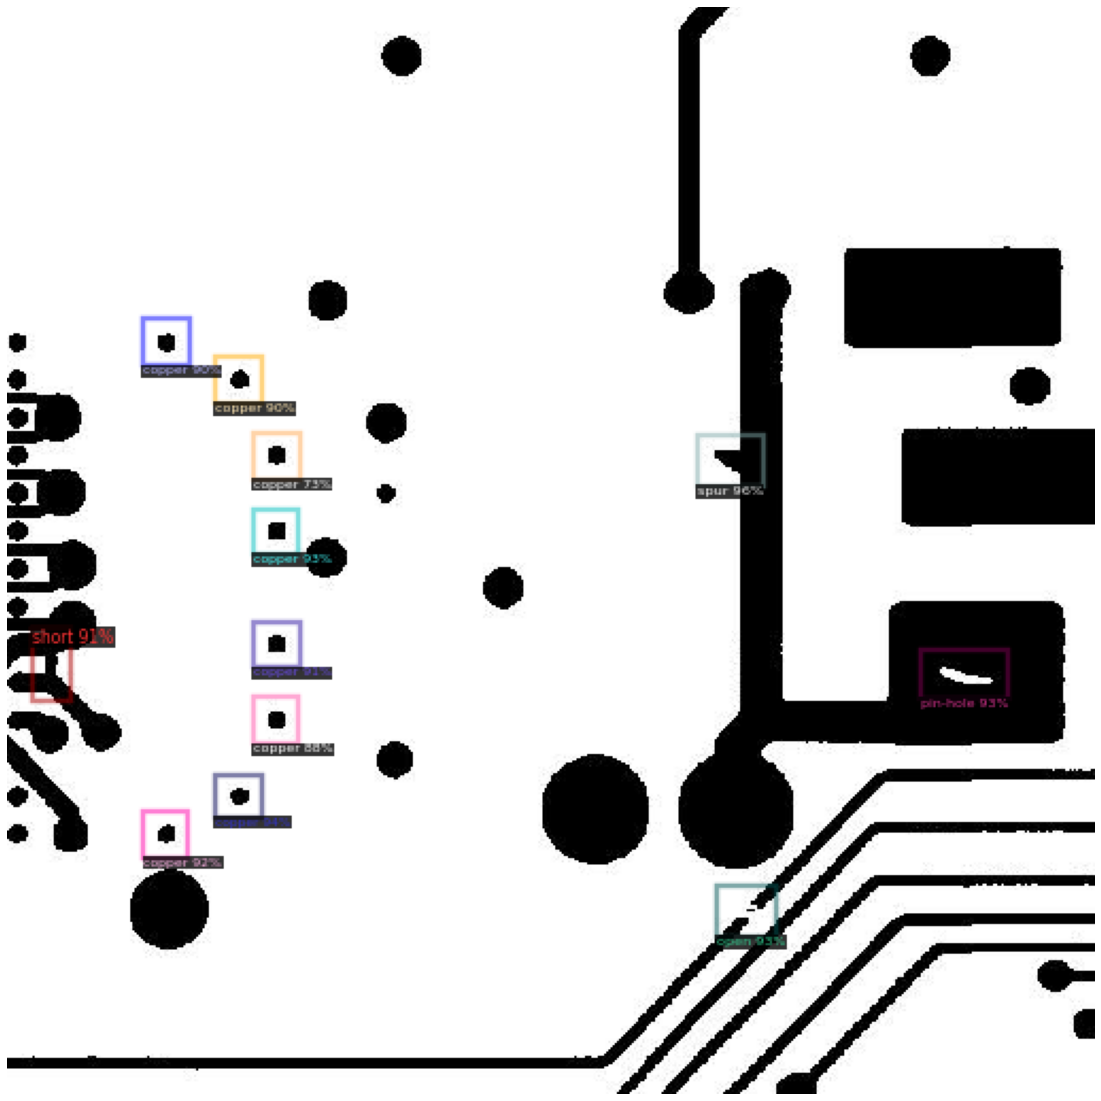

tensor([0, 3, 4, 0, 3, 5, 0, 2, 1], device='cuda:0')
Boxes(tensor([[548.9959, 283.9444, 584.2261, 309.9882],
        [280.0173, 480.9651, 308.2857, 508.9812],
        [379.7101, 417.1086, 406.0379, 443.2964],
        [108.0252, 125.8577, 142.2271, 153.9000],
        [245.2612, 284.1929, 275.5644, 309.6360],
        [397.0370, 346.5987, 426.5221, 370.0402],
        [431.2964, 538.5615, 467.0266, 569.4206],
        [360.9971, 338.9269, 386.0186, 363.9598],
        [ 45.7555,  41.6560,  80.4036,  80.8302]], device='cuda:0'))


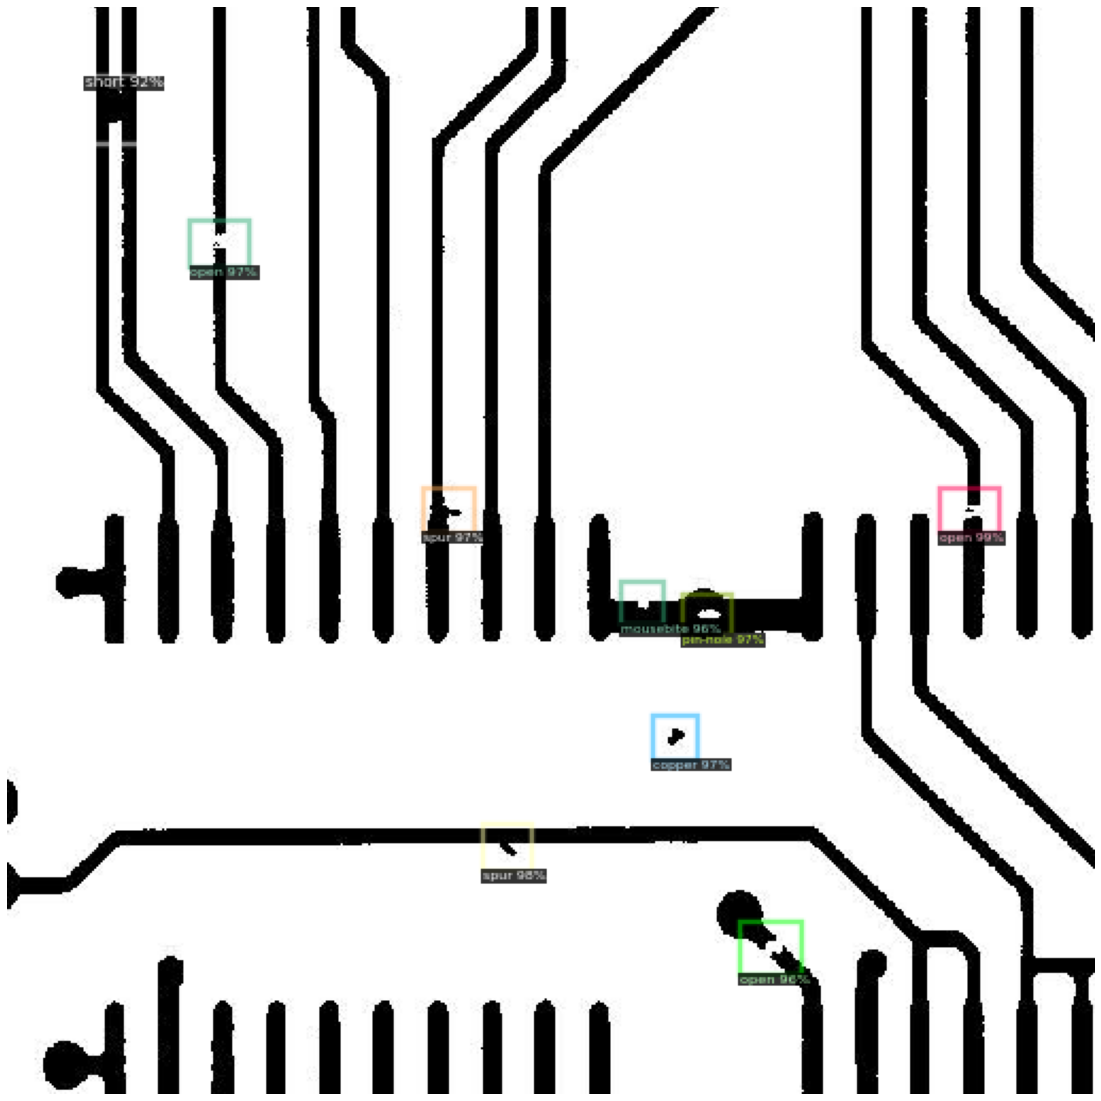

In [22]:
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im,
                   metadata=PCB_metadata, 
                   scale=0.8,
                   instance_mode =  ColorMode.IMAGE
        )
                   # remove the colors of unsegmented pixels
    print(outputs['instances'].pred_classes)
    print(outputs["instances"].pred_boxes)

    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image())

In [23]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset, LVISEvaluator
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("PCB_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "PCB_test")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [01/11 06:29:25 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/11 06:29:25 d2.evaluation.coco_evaluation]: 'PCB_test' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[01/11 06:29:25 d2.data.datasets.coco]: Converting annotations of dataset 'PCB_test' to COCO format ...)
[01/11 06:29:26 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[01/11 06:29:27 d2.data.datasets.coco]: Conversion finished, #images: 500, #annotations: 3140
[01/11 06:29:27 d2.data.datasets.coco]: Caching COCO format annotations at './output/PCB_test_coco_format.json' ...
[01/11 06:29:28 d2.data.build]: Distribution of instances among all 6 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    open    | 659    

OrderedDict([('bbox',
              {'AP': 66.35991210609545,
               'AP-copper': 77.01779778124646,
               'AP-mousebite': 64.47544216778644,
               'AP-open': 62.38010559717148,
               'AP-pin-hole': 79.06192631876773,
               'AP-short': 50.14270774841301,
               'AP-spur': 65.08149302318752,
               'AP50': 93.8883852093529,
               'AP75': 81.01538908896863,
               'APl': 80.0,
               'APm': 67.76808519851491,
               'APs': 64.44430148677661})])

In [ ]:
# install dependencies
!pip install --upgrade pip
!pip install kaggle --quiet
!pip install fastai --quiet
!pip install lightly --quiet

     |████████████████████████████████| 1.5MB 8.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 69 kB 4.3 MB/s 
     |████████████████████████████████| 122 kB 17.8 MB/s 
     |████████████████████████████████| 112 kB 38.1 MB/s 
     |████████████████████████████████| 665 kB 43.6 MB/s 
     |████████████████████████████████| 91 kB 7.7 MB/s 
     |████████████████████████████████| 829 kB 41.8 MB/s 
     |████████████████████████████████| 269 kB 44.6 MB/s 


In [ ]:
# imports
import os
from fastai.vision import *

In [ ]:
import warnings;
warnings.filterwarnings('ignore');

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

## 1.1 Download the dataset from Kaggle using their API

1. Go to https://www.kaggle.com/
1. Click on signin or register on top right to create/ login to your account
1. Once you created your account click on "My Account" go to https://www.kaggle.com/YOUR_USER_NAME/account 
  (replace YOUR_USER_NAME with your kaggle user name)
1. On your user account page scroll down and click on "Generate New API Token"
1. Your browser should now download a "kaggle.json" file with the credentials

In [ ]:
!mkdir -p ~/.kaggle
# kaggle.json 업로드


In [ ]:
!cd ~
!pwd

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images --force

 99% 431M/435M [00:04<00:00, 117MB/s]
100% 435M/435M [00:05<00:00, 89.7MB/s]


In [ ]:
# the downloaded dataset is a .zip archive. Let's unzip it
!unzip -q dogs-cats-images.zip;

# 2. Select the samples for few-shot learning

There are a few things we want to ensure when selecting the samples for few-shot learning

- we want the selected samples to cover the full space of our data (we prefer different images over very similar ones). This ensures that our model will be more robust to unseen data. Additionally, this prevents our model from overfitting. 
- we want only a "few" samples. Let's aim for 10 images in total

In order to select the data based on our preferences we use WhatToLabel and its python package borisml. The free version is sufficient and allows us to select the data exactly the way we want.

## 2.1 Create an account on Lightly

1. Go to app.lightly.ai
1. Signin to login to your existing account or signin to create a new one
1. Click on My Datasets
1. Click on "Create a new dataset"
1. You should now see a sample command for the CLI (command line interface) tool to upload images

We will now use the whattolabel CLI to upload our dataset.

In [ ]:
# replace with your token and dataset id 
TOKEN = 'PUT_YOUR_TOKEN_HERE'
DATASET_ID = 'PUT_YOUR_DATASET_ID_HERE'

In [ ]:
# we first use lightly to create an embedding of our dataset
# lightly uses self-supervised learning which allows it to create embeddings without labels
!lightly-magic input_dir='dog vs cat/dataset/training_set' hydra.run.dir=./ trainer.max_epochs=1 loader.batch_size=256 collate.input_size=64 

Downloading: "https://storage.googleapis.com/models_boris/whattolabel-resnet18-simclr-d16-w1.0-i-58852cb9.pth" to /root/.cache/torch/hub/checkpoints/whattolabel-resnet18-simclr-d16-w1.0-i-58852cb9.pth
100% 42.7M/42.7M [00:01<00:00, 25.5MB/s]
GPU available: True, used: True
[2020-08-25 14:22:41,202][lightning][INFO] - GPU available: True, used: True
TPU available: False, using: 0 TPU cores
[2020-08-25 14:22:41,202][lightning][INFO] - TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
[2020-08-25 14:22:41,202][lightning][INFO] - CUDA_VISIBLE_DEVICES: [0]
2020-08-25 14:22:41.374309: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  | Name      | Type         | Params
-------------------------------------------
0 | model     | ResNetSimCLR | 11 M  
1 | criterion | NTXentLoss   | 0     
[2020-08-25 14:22:42,387][lightning][INFO] - 
  | Name      | Type         | Params
------------------------------------

In [ ]:
# upload the samples and embeddings to the cloud
!lightly-upload input_dir='dog vs cat/dataset/training_set' embeddings='embeddings.csv' token=$TOKEN dataset_id=$DATASET_ID upload='thumbnails'

100% 8000/8000 [08:55<00:00, 16.29imgs/s]
  0% 0/8000 [00:00<?, ?embs/s]
  0% 32/8000 [00:01<06:12, 21.37embs/s]
  1% 64/8000 [00:02<06:09, 21.45embs/s]
  1% 96/8000 [00:04<06:14, 21.13embs/s]
  2% 128/8000 [00:06<06:16, 20.90embs/s]
  2% 160/8000 [00:07<06:12, 21.05embs/s]
  2% 192/8000 [00:09<06:11, 21.00embs/s]
  3% 224/8000 [00:10<06:06, 21.24embs/s]
  3% 256/8000 [00:12<06:03, 21.29embs/s]
100% 8000/8000 [09:10<00:00, 16.29imgs/s]
  4% 320/8000 [00:15<06:00, 21.32embs/s]
  4% 352/8000 [00:16<05:58, 21.35embs/s]
  5% 384/8000 [00:18<05:57, 21.30embs/s]
  5% 416/8000 [00:19<05:57, 21.21embs/s]
  6% 448/8000 [00:21<05:54, 21.33embs/s]
  6% 480/8000 [00:22<05:51, 21.39embs/s]
  6% 512/8000 [00:24<05:51, 21.31embs/s]
  7% 544/8000 [00:25<05:51, 21.23embs/s]
  7% 576/8000 [00:27<05:56, 20.84embs/s]
  8% 608/8000 [00:28<05:53, 20.88embs/s]
  8% 640/8000 [00:30<05:57, 20.60embs/s]
  8% 672/8000 [00:31<05:58, 20.45embs/s]
  9% 704/8000 [00:33<05:57, 20.39embs/s]
  9% 736/8000 [00:35<05:57,

## 2.2 Subsample the dataset on Lightly

1. Go back to app.lightly.ai
1. Open your dataset and click on Analyze & Filter -> Sampling
1. Create a new sampling with the "Coreset" or "Bit" sampling strategy
1. Once the sampling is completed use the slider on the right side to select around **10 images**
1. Save your selection by creating a new tag called **"tiny"** in the menu on the left

In [ ]:
# only change the following variables if you chose a different tag-name
TAG_NAME = 'tiny'

## 2.3 Download the dataset and annotate the images



In [ ]:
!lightly-download tag_name=$TAG_NAME input_dir='dog vs cat/dataset/training_set' output_dir='dog vs cat/dataset/tiny_set' token=$TOKEN dataset_id=$DATASET_ID 

rm: cannot remove 'dog vs cat/dataset/tiny_set': No such file or directory
Copying files from /content/dog vs cat/dataset/training_set to /content/dog vs cat/dataset/tiny_set.
100% 10/10 [00:00<00:00, 5330.84it/s]


# 3. Train a model with few-shot learning
In few-shot learning, a pre-trained model is finetuned on a tiny set of unseen images from a different task. In our case, the fastai model was pre-trained on ImageNet and we will now finetune it on the few selected images from the dogs-and-cats dataset.

In [ ]:
# specify the folder which holds train and eval sets
data = ImageList.from_folder('dog vs cat/dataset/')

In [ ]:
# train on the tiny dataset
data = data.split_by_folder(train='tiny_set', valid='test_set')

In [ ]:
# (the format of the filenames is dog.id.ext/cat.id.ext)
data = data.label_from_func(func=lambda o: os.path.basename(o).split('.')[0])

In [ ]:
# data augmentation
data = data.transform(get_transforms(do_flip=True, flip_vert=True), size=224)

In [ ]:
# data bunch
data = data.databunch(bs=4)

In [ ]:
# normalize images
data = data.normalize(imagenet_stats)

In [ ]:
# use a resnet-18 and keep track of evaluation accuracy
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

In [ ]:
learner.fit_one_cycle(8, max_lr=slice(1e-4, 1e-3))

# 4. Results
Let's look at how well our few-shot model performs. Keep in mind that the model was only trained on 10 sample images!

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

The confusion matrix on the validation data is shown below. **The model achieves high accuracy (over 80%).**

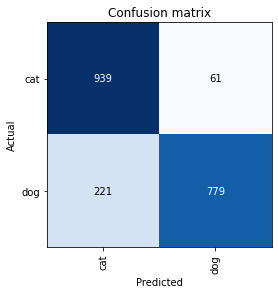

In [ ]:
interp.plot_confusion_matrix()

Let's now look at the images for which the loss of the model was the largest. 

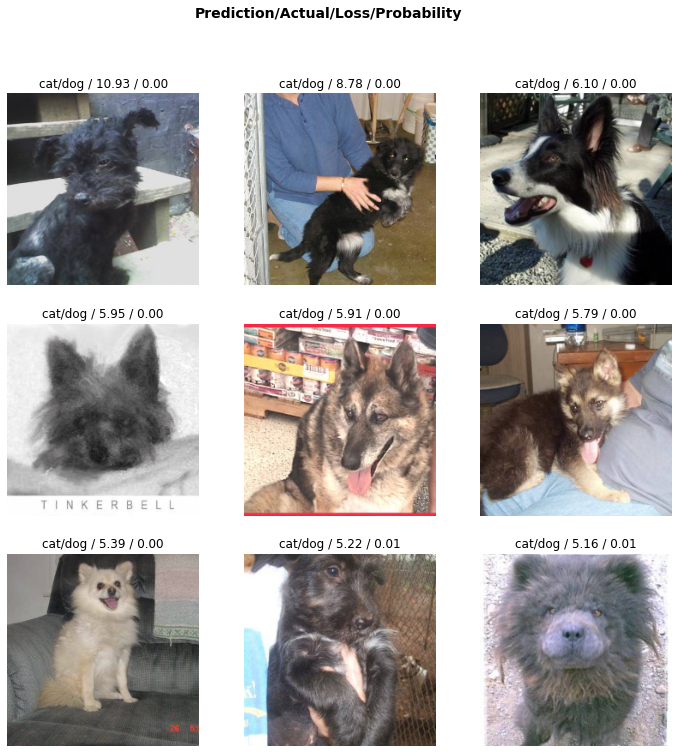

In [ ]:
interp.plot_top_losses(9, figsize=(12,12))